# Deep Learning Text Classification with TensorFlow and Keras

In this code, we are building a deep learning model for text classification using TensorFlow and Keras. The model architecture includes layers like Embedding, Bidirectional LSTM, Dense, and more. We also use various data preprocessing techniques and data visualization libraries.

## Libraries and Modules

To run this code successfully, you will need to import the following Python libraries and modules:

- `numpy` (Numerical Python) for numerical operations.
- `pandas` for data manipulation and analysis.
- `tensorflow.keras` for building and training deep learning models.
- Various layers from `tensorflow.keras.layers` for constructing the neural network.
- `Tokenizer` and `pad_sequences` from `tensorflow.keras.preprocessing.text` for text preprocessing.
- `plot_model` from `tensorflow.keras.utils` for model visualization.
- `matplotlib.pyplot` for creating data visualizations.
- `seaborn` for enhancing data visualizations.
- `train_test_split` from `sklearn.model_selection` for splitting data into training and testing sets.

Feel free to refer to this code and customize it for your specific text classification task.

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as pltpeople
import seaborn as sns
from sklearn.model_selection import train_test_split

The DataFrame `df` contains a total of 631765 rows of data.

In [114]:
df=pd.read_csv('sampled_dataset.csv')
len(df)

631765

## Randomly Sampling 20,000 Rows from Label 0 and Label 4

In [115]:
# Randomly sample 20,000 rows from label 0
df_label_0_sampled = df[df['label'] == 0].sample(n=20000,random_state=42)
# Randomly sample 20,000 rows from label 4
df_label_4_sampled = df[df['label'] == 4].sample(n=20000, random_state=42)

## Concatenating DataFrames for Labels 0 and 4


In [116]:
df = pd.concat([df_label_0_sampled, df_label_4_sampled])

## Converting 'tweet' Column to String Data Type


In [117]:
df['tweet'] = df['tweet'].astype(str)

## Filtering Valid Sentiments in the DataFrame

In [118]:
valid_sentiments = [4,0]
df = df[df['label'].isin(valid_sentiments)]

## Counting Label Frequencies in the DataFrame


In [119]:
df['label'].value_counts()

0    20000
4    20000
Name: label, dtype: int64

## Reclassifying Label 4 as Label 1


In [120]:
df.loc[df['label'] == 4,'label'] = 1

## Visualizing Sentiment Distribution in the DataFrame

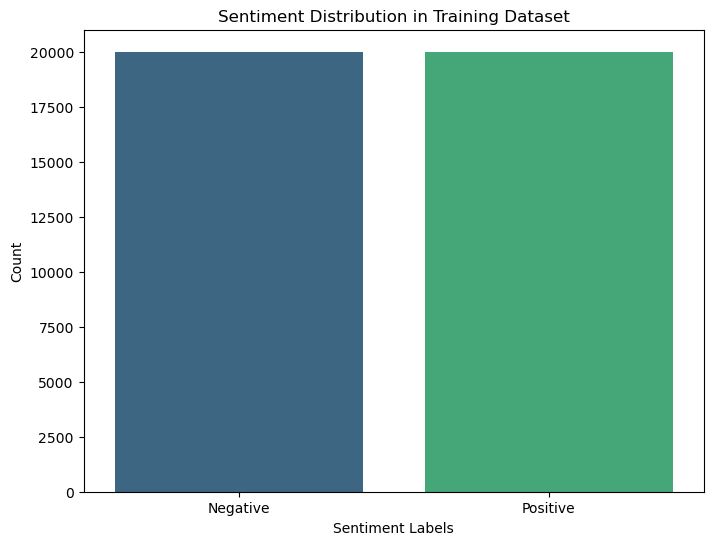

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

label_mapping = {0: 'Negative', 1: 'Positive'}
df['sentiment'] = df['label'].map(label_mapping)
# Class Distribution in 'label' column with 'viridis' color palette
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution in Training Dataset')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.show()

## Pie Chart of Sentiment Distribution

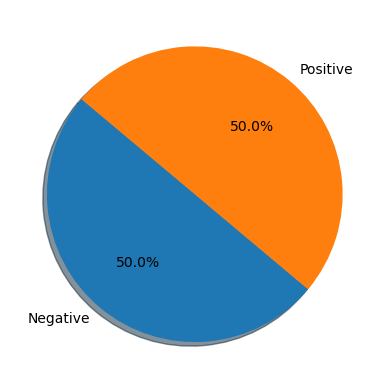

In [38]:
import matplotlib.pyplot as plt
sentiment_count = df["sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

## Text Preprocessing Function for Cleaning Tweets


In [121]:
# !pip install contractions
# !pip install emoji
import re
import contractions
import emoji

def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet)
    tweet = emoji.demojize(tweet)
    tweet = re.sub(r'(.)\1+',r'\1\1', tweet)
    # Remove mentions and hashtags
    tweet = re.sub(r"@\w+|#\w+", "", tweet)
    tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', '', tweet)
    # Remove special characters and numbers
    tweet = re.sub(r"[^a-zA-Z\s]", "", tweet)
    tweet = contractions.fix(tweet)
    # Convert to lowercase
    tweet = tweet.lower()

    # Remove extra whitespaces
    tweet = re.sub(r"\s+", " ", tweet).strip()

    return tweet

## Applying Text Cleaning Function to DataFrame

In [122]:
df['text'] = df['tweet'].apply(clean_tweet)

## Importing WordCloud for Generating Word Clouds


In [41]:
from wordcloud.wordcloud import WordCloud

## Generating Word Cloud for Positive Sentiment Tweets


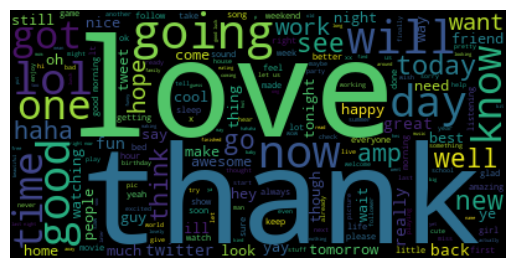

In [42]:
pos_tweets = df[df["sentiment"]=="Positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Generating Word Cloud for Negative Sentiment Tweets


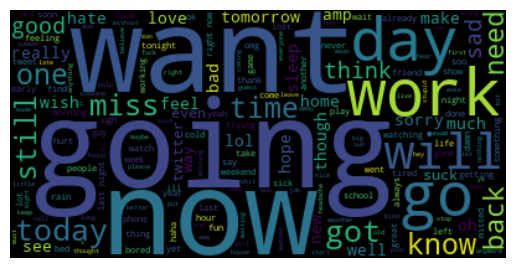

In [43]:
pos_tweets = df[df["sentiment"]=="Negative"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Generating Word Cloud for Tweet Text


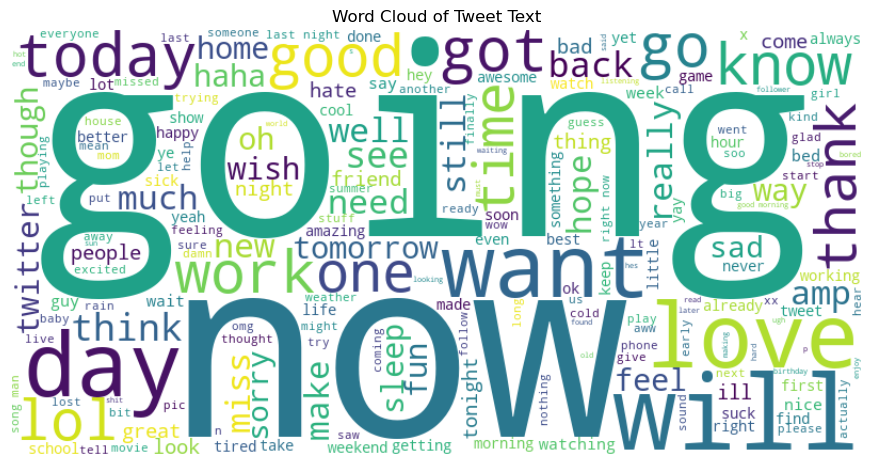

In [44]:
from wordcloud import WordCloud
# Generate a word cloud from the tweet text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['text']))

plt.figure(figsize=(11, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Tweet Text")
plt.axis('off')
plt.show()

## Calculating and Visualizing the Length of Tweets


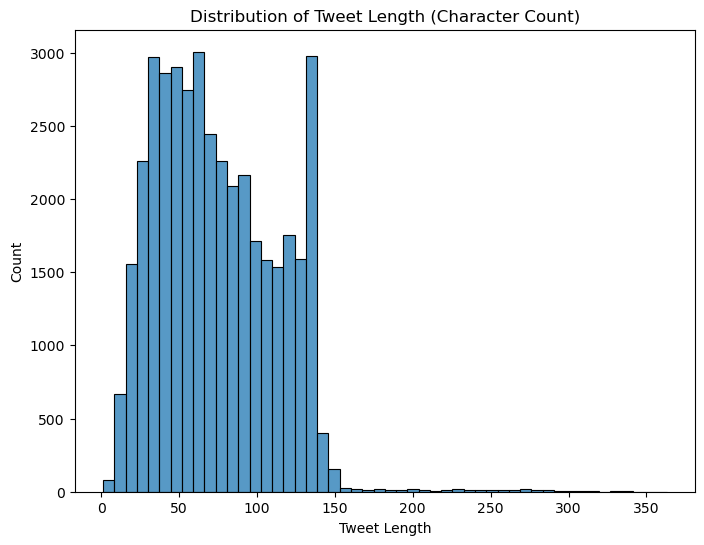

In [45]:
# Calculate and visualize the length of tweets
df['tweet_length'] = df['tweet'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df['tweet_length'], bins=50)
plt.title("Distribution of Tweet Length (Character Count)")
plt.xlabel("Tweet Length")
plt.ylabel("Count")
plt.show()

## Splitting the Data into Training and Testing Sets


In [123]:
X = df['text'].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Tokenizing Text Data



In [124]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

## Saving Tokenizer to a Pickle File


In [125]:
import pickle
with open('tokenizer_sih.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Training Data Sequences



In [112]:
X_train_seq

[[4847, 3345, 10972, 4187, 1247, 2037, 24, 4, 2038],
 [155, 284, 1068, 99, 220],
 [1,
  11,
  173,
  1444,
  4848,
  6,
  4849,
  13,
  1068,
  1770,
  5860,
  15,
  5861,
  3,
  4849,
  10973,
  73,
  387,
  10974],
 [1, 46, 72, 72, 35, 231, 38, 14, 10975, 30, 16, 1, 11, 9, 1162],
 [138, 16, 93, 25, 148],
 [6,
  571,
  586,
  220,
  2270,
  10976,
  253,
  672,
  10977,
  3685,
  3,
  3686,
  88,
  1571,
  7,
  219,
  4188,
  2411,
  18,
  6,
  973,
  2412,
  2271],
 [741, 131, 67, 15, 4, 1697, 157],
 [6, 4850, 816],
 [28,
  316,
  1,
  15,
  89,
  481,
  13,
  56,
  748,
  943,
  84,
  35,
  31,
  12,
  4,
  275,
  748,
  2,
  187,
  3,
  1223,
  8,
  115,
  84,
  9,
  89,
  2,
  111,
  189],
 [442, 2, 15, 4, 32, 51, 28, 3, 1190, 10978],
 [1191,
  7,
  148,
  68,
  105,
  129,
  1,
  11,
  85,
  307,
  6,
  369,
  1,
  46,
  110,
  19,
  79,
  21,
  27,
  120,
  131,
  2,
  615,
  31,
  1917,
  1,
  49],
 [65, 23, 44, 297, 3687, 12, 3, 263, 16, 7, 13, 199],
 [2792, 2792, 2792, 1771, 

## Padding Text Sequences to a Maximum Length


In [48]:
max_sequence_length = 100  # Choose an appropriate sequence length

X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

## Loading GloVe Word Embeddings


In [49]:
# Load GloVe embeddings into a dictionary
glove_embeddings = {}
embedding_dim = 100  # Adjust the dimension based on your model

with open('glove.6B.100d.txt', encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        glove_embeddings[word] = vector

## Creating Embedding Matrix from GloVe Embeddings


In [50]:
import numpy as np
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

## Creating an Embedding Layer with Pre-trained Weights


In [51]:
from keras.layers import Embedding
# vocab_size = len(tokenizer.word_index) + 1
# Define the embedding layer with pre-trained weights
embedding_layer = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],  # Set the weights to the pre-trained embedding matrix
    input_length=max_sequence_length,
    trainable=False  # Freeze the pre-trained embeddings
)

## Importing Necessary Keras Modules for Building a Sequential Model


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.regularizers import l2

## Building a Sequential Neural Network Model


In [52]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(units=512,kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

## Compiling the Neural Network Model


In [54]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint('model/', save_best_only=True)

model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss=BinaryCrossentropy(), 
              metrics=['accuracy', AUC(name='auc')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          2972000   
                                                                 
 lstm_1 (LSTM)               (None, 512)               1255424   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 4227937 (16.13 MB)
Trainable params: 1255937 (4.79 MB)
Non-trainable params: 2972000 (11.34 MB)
_________________________________________________________________


## Training the Neural Network Model


In [55]:
model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=5, batch_size=64)

Epoch 1/5
500/500 [==============================] - 291s 579ms/step - loss: 1.3598 - accuracy: 0.6560 - auc: 0.7104 - val_loss: 0.8329 - val_accuracy: 0.6635 - val_auc: 0.7468
Epoch 2/5
500/500 [==============================] - 334s 669ms/step - loss: 0.7289 - accuracy: 0.6910 - auc: 0.7542 - val_loss: 0.6802 - val_accuracy: 0.6952 - val_auc: 0.7619
Epoch 3/5
500/500 [==============================] - 291s 581ms/step - loss: 0.6599 - accuracy: 0.6988 - auc: 0.7643 - val_loss: 0.6445 - val_accuracy: 0.7039 - val_auc: 0.7693
Epoch 4/5
500/500 [==============================] - 325s 651ms/step - loss: 0.6335 - accuracy: 0.7026 - auc: 0.7712 - val_loss: 0.6279 - val_accuracy: 0.7054 - val_auc: 0.7708
Epoch 5/5
500/500 [==============================] - 342s 683ms/step - loss: 0.6186 - accuracy: 0.7054 - auc: 0.7747 - val_loss: 0.6162 - val_accuracy: 0.7059 - val_auc: 0.7751


## Making Predictions with the Trained Model


In [58]:
y_pred = model.predict(X_test_pad)

250/250 [==============================] - 41s 162ms/step


## Evaluating Model Performance: Confusion Matrix


In [59]:
y_pred_binary = (y_pred > 0.5).astype(int)
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[3045  969]
 [1384 2602]]


## Evaluating Model Performance: Accuracy, Precision, Recall, and F1 Score


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.71
Precision: 0.73
Recall: 0.65
F1 Score: 0.69


## ROC Curve for Model Evaluation


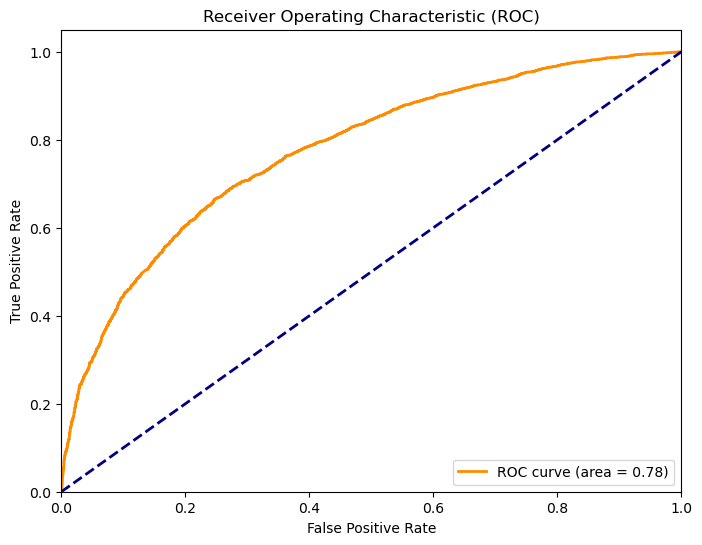

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Heatmap Visualization of Confusion Matrix


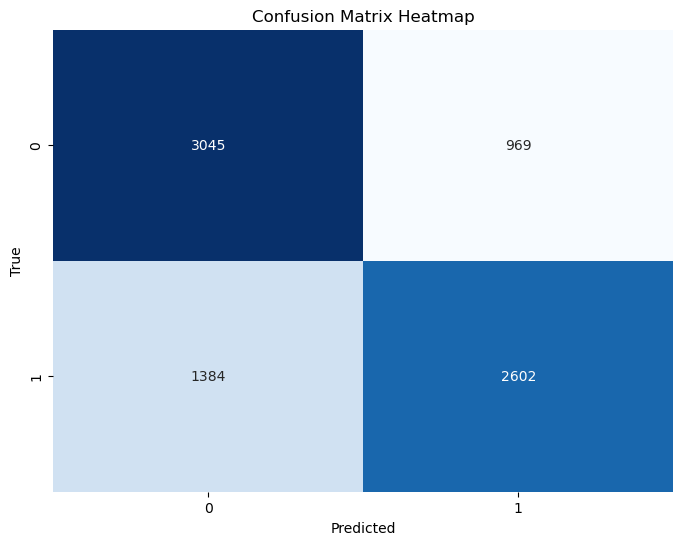

In [62]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Precision-Recall Curve for Model Evaluation


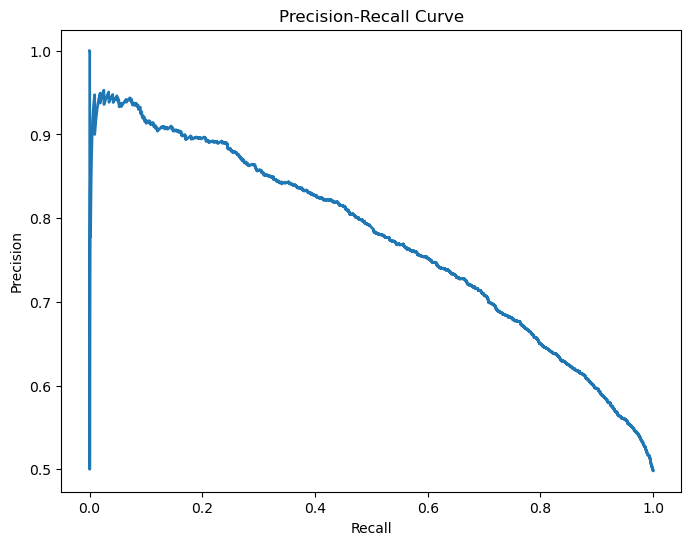

In [63]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


## Classification Report


In [65]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_binary, target_names=['Negative', 'Positive'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.69      0.76      0.72      4014
    Positive       0.73      0.65      0.69      3986

    accuracy                           0.71      8000
   macro avg       0.71      0.71      0.70      8000
weighted avg       0.71      0.71      0.71      8000



## Sentiment Analysis on Custom Input Text


In [126]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Custom input text (replace with your own text)
custom_text = '''Thanks for checking our work!'''
# Preprocess the custom input text (use the same preprocessing function)
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet)
    
    # Remove mentions and hashtags
    tweet = re.sub(r"@\w+|#\w+", "", tweet)
    
    # Remove special characters and numbers
    tweet = re.sub(r"[^a-zA-Z\s]", "", tweet)
    
    # Convert to lowercase
    tweet = tweet.lower()
    
    # Remove extra whitespaces
    tweet = re.sub(r"\s+", " ", tweet).strip()
    
    return tweet

# Tokenize and pad the custom input text
custom_text = clean_tweet(custom_text)  # Preprocess the text
print(custom_text)
print([custom_text])
custom_seq = tokenizer.texts_to_sequences([custom_text])
print(custom_seq)
custom_seq = pad_sequences(custom_seq, maxlen=max_sequence_length)  # Pad the sequence

# Make predictions with the model
custom_sentiment_prob = model.predict(custom_seq)[0][0]

# Define custom sentiment categories and thresholds
thresholds = [(0.9, "Highly Positive"), (0.7, "Positive"), (0.5, "Neutral"), (0.3, "Negative")]

# Initialize custom_sentiment to "Highly Negative" by default
custom_sentiment = "Highly Negative"

# Determine sentiment based on the probability and thresholds
for threshold, sentiment_label in thresholds:
    if custom_sentiment_prob >= threshold:
        custom_sentiment = sentiment_label
        break  # Break the loop once a matching threshold is found

# Print the sentiment and probability score
print(f"Sentiment: {custom_sentiment}")
print(f"Sentiment Probability: {custom_sentiment_prob:.4f}")

print(tokenizer)

thanks for checking our work
['thanks for checking our work']
[[74, 13, 1433, 171, 50]]
1/1 [==============================] - 0s 94ms/step
Sentiment: Positive
Sentiment Probability: 0.8378


## Saving the Trained Model


In [67]:
import os
from tensorflow.keras.models import load_model

# Save the trained model to an HDF5 file
model.save("sentix_model.h5")

# Get the current working directory
current_directory = os.getcwd()

# Print the current directory
print("Model saved in directory:", current_directory)

Model saved in directory: C:\Users\ADITYA


C:\Users\ADITYA\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
